In [ ]:
#Librerias necesarias para el modelado
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, 
    roc_auc_score,
    accuracy_score, 
    f1_score,
    roc_curve, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
from xgboost import XGBClassifier

Documentos con los que se van a trabajar

In [80]:
df = pd.read_csv("C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/processed/datos_creditos_encoding.csv")
df_nuevos = pd.read_csv("C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/processed/datos_nuevos_encoding.csv")

In [ ]:
#Función para presentar los resultados de cada modelo

def evaluate_model(model, X_test, y_test, model_name):
    # Predicciones
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Reporte de clasificación
    print(f"{model_name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score: {roc_auc:.2f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
#Función para crear matriz de resultados

def evaluate_and_store(model, X_test, y_test, model_name, results):
    # Predicciones
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="binary")  # Para problemas binarios
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Agregar los resultados a la lista
    results.append({
        "Modelo": model_name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "AUC-ROC": auc,
        "TP": cm[1, 1],  # Verdaderos positivos
        "FP": cm[0, 1],  # Falsos positivos
        "FN": cm[1, 0],  # Falsos negativos
        "TN": cm[0, 0]   # Verdaderos negativos
    })

# Lista para almacenar resultados
results = []

Modelado de Regresión Logísitca

El modelo de regresión logística es una técnica estadística utilizada principalmente para resolver problemas de clasificación binaria, aunque también puede extenderse a problemas de clasificación multiclase. Su objetivo es predecir la probabilidad de que un evento pertenezca a una categoría específica.

Parametros

test_size : 0.2

random state: 42

=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1493
           1       0.73      0.64      0.68       287

    accuracy                           0.90      1780
   macro avg       0.83      0.80      0.81      1780
weighted avg       0.90      0.90      0.90      1780

ROC-AUC Score: 0.94


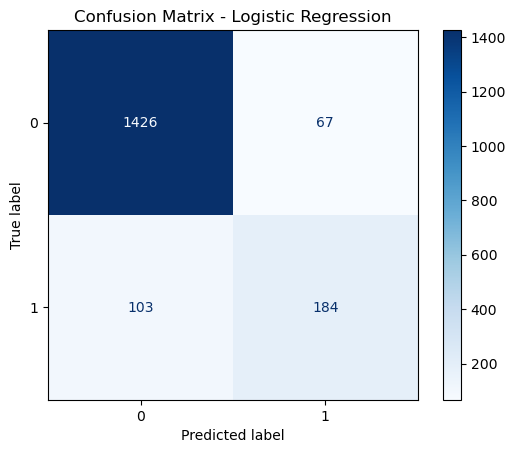

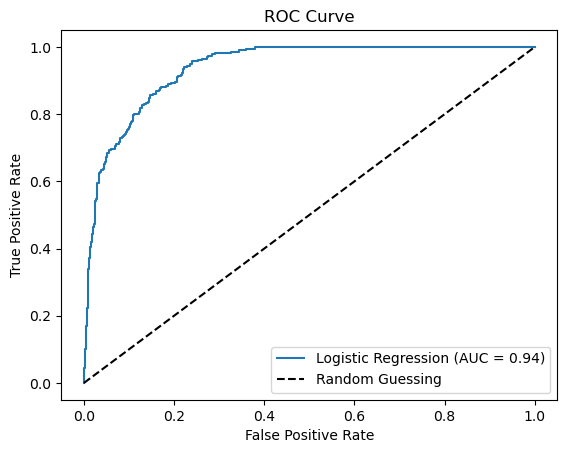

In [83]:
# Dividir datos en X (features) e y (target)
X = df.drop(columns=['falta_pago'])  # Excluye la columna target
y = df['falta_pago']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar datos numéricos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo de regresión logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Logistic Regression
evaluate_model(logreg, X_test, y_test, "Logistic Regression")

#Para presentar en tabla
# Evaluar Logistic Regression
evaluate_and_store(logreg, X_test, y_test, "Logistic Regression", results)

Modelado XG Boost

El modelo XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje automático basado en árboles de decisión, diseñado para tareas de clasificación, regresión y otras aplicaciones. Es una implementación optimizada del algoritmo de gradient boosting, que combina múltiples modelos débiles (generalmente árboles de decisión) para formar un modelo fuerte.

Parametros

test_size: 0.2

random_state: 42

c:\Users\Asus\anaconda3\envs\OCT2324\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:46:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1493
           1       0.71      0.69      0.70       287

    accuracy                           0.90      1780
   macro avg       0.83      0.82      0.82      1780
weighted avg       0.90      0.90      0.90      1780

ROC-AUC Score: 0.95


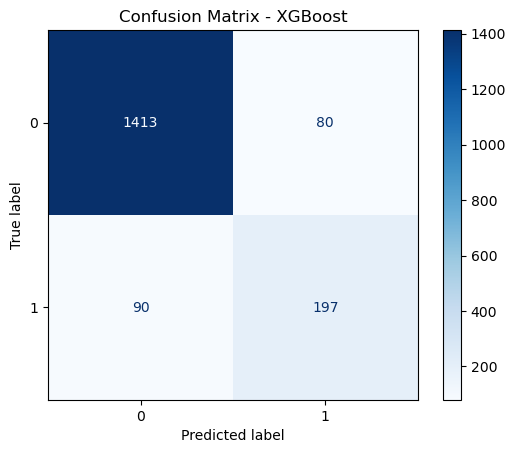

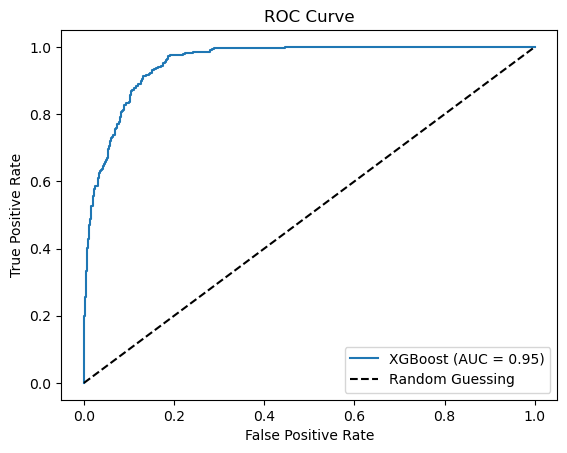

In [84]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar datos numéricos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# XGBoost
evaluate_model(xgb, X_test, y_test, "XGBoost")


# Evaluar XGBoost
evaluate_and_store(xgb, X_test, y_test, "XGBoost", results)

Modelo Random Forest

Es un algoritmo de aprendizaje automático basado en árboles de decisión, diseñado para tareas de clasificación, regresión y otras aplicaciones. Es un tipo de método de ensamble que combina múltiples árboles de decisión independientes para formar un modelo más robusto y preciso.

Parametros

test_size: 0.2

random_state: 42

=== RandomForest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1493
           1       0.79      0.63      0.70       287

    accuracy                           0.91      1780
   macro avg       0.86      0.80      0.83      1780
weighted avg       0.91      0.91      0.91      1780

ROC-AUC Score: 0.95


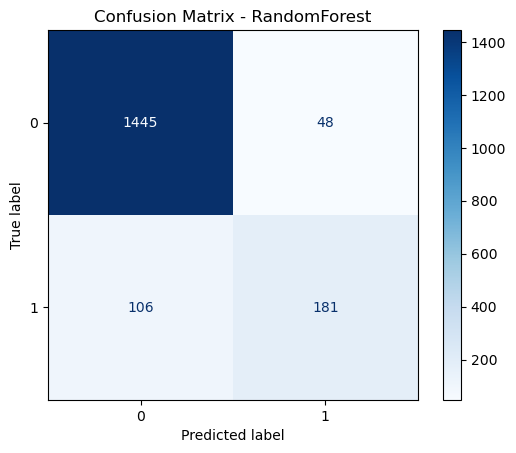

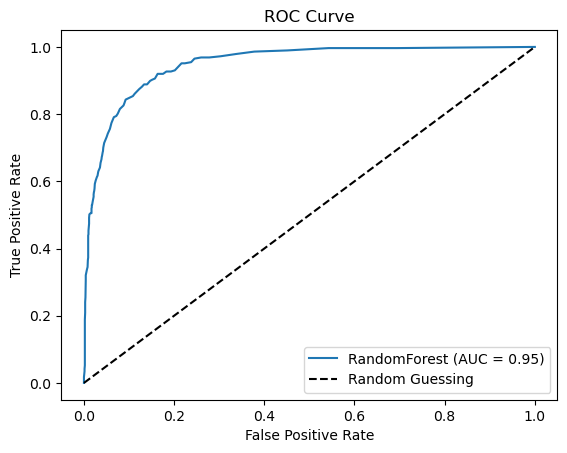

In [85]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline con preprocesamiento y modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# random Forest
evaluate_model(pipeline, X_test, y_test, "RandomForest")

# Evaluar LightGBM
evaluate_and_store(pipeline, X_test, y_test, "RandomForest", results)

Matriz de resultados

In [86]:
# Crear DataFrame de resultados
results_df = pd.DataFrame(results)

# Mostrar resultados comparativos
results_df.head()

,Modelo,Accuracy,F1-Score,AUC-ROC,TP,FP,FN,TN
0,Logistic Regression,0.904494,0.684015,0.937782,184,67,103,1426
1,XGBoost,0.904494,0.698582,0.954977,197,80,90,1413
2,RandomForest,0.913483,0.701550,0.948685,181,48,106,1445


Conclusión:

RandomForest tiene la mejor accuracy (91.35%) y un excelente F1-Score (0.702), aunque tiene un poco más de FN (106) en comparación con XGBoost. Sin embargo posee el mayor puntaje en verdaderos negativos, lo que nos ayudaría a conocer quienes tienen la mayor probabilidad de las personas que seguiran trabajando.

Considerando lo anteriormente expuesto, se selecciona el modelo RandomForest

In [87]:
df_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   antiguedad_cliente              107 non-null    int64  
 1   gastos_ult_12m                  107 non-null    float64
 2   limite_credito_tc               107 non-null    float64
 3   nivel_educativo                 107 non-null    int64  
 4   nivel_tarjeta                   107 non-null    int64  
 5   operaciones_ult_12m             107 non-null    float64
 6   personas_a_cargo                107 non-null    float64
 7   edad                            107 non-null    int64  
 8   importe_solicitado              107 non-null    int64  
 9   duracion_credito                107 non-null    int64  
 10  antiguedad_empleado             107 non-null    float64
 11  ingresos                        107 non-null    int64  
 12  pct_ingreso                     107 

Despliegue

In [88]:
# Random Forest
# Predicciones

y_pred_rf = pipeline.predict(df_nuevos)
y_proba_rf = pipeline.predict_proba(df_nuevos)[:, 1]

# Mostrar resultados
print(f"Predicción de RandomForest: {y_pred_rf}")
print(f"Probabilidades de RandomForest: {y_proba_rf}")

Predicción de RandomForest: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0]
Probabilidades de RandomForest: [0.   0.   0.37 0.   0.   0.   0.24 0.   0.   0.01 0.1  0.02 0.84 0.01
 0.01 0.   0.36 0.24 0.41 0.   0.82 0.02 0.08 0.9  0.05 0.27 0.24 0.29
 0.04 0.24 0.03 0.01 0.86 0.61 0.   0.5  0.43 0.08 0.   0.09 0.03 0.25
 0.   0.4  0.05 0.01 0.3  0.02 0.77 0.26 0.64 0.59 0.05 0.18 0.   0.51
 0.15 0.   0.09 0.14 0.01 0.01 0.01 0.   0.13 0.   0.08 0.   0.3  0.69
 0.   0.   0.66 0.01 0.02 0.05 0.4  0.17 0.02 0.94 0.92 0.94 0.07 0.96
 0.89 0.   0.1  0.   0.19 0.62 0.22 0.   0.83 0.18 0.   0.01 0.   0.07
 0.17 0.01 0.91 0.87 0.91 0.01 0.01 0.93 0.  ]


In [91]:
#Appending resultados en dataset

datos_nuevos = pd.read_csv("C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/processed/datos_nuevos.csv")


In [93]:
datos_nuevos['Falta_pago_pred'] = y_pred_rf

In [94]:
datos_nuevos.head(30)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo,Falta_pago_pred
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,SOLTERO,ACTIVO,15478.0,F,4905.0,5,0,109.0,1.0,0
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,CASADO,ACTIVO,3950.0,M,1663.0,4,0,82.0,3.0,0
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,CASADO,ACTIVO,3078.0,M,4323.0,5,0,58.0,1.0,0
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,CASADO,ACTIVO,4314.0,F,3809.0,5,0,81.0,2.0,0
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,CASADO,ACTIVO,4216.0,F,4712.0,3,0,82.0,1.0,0
5,708516646,26,6000,2,3.0,HIPOTECA,53000,MEJORAS_HOGAR,0.11,9.99,...,CASADO,ACTIVO,4159.0,F,2588.0,3,0,83.0,2.0,0
6,708519228,24,6625,4,3.0,HIPOTECA,57100,PAGO_DEUDAS,0.12,11.22,...,CASADO,PASIVO,2041.0,F,2694.0,4,0,57.0,1.0,0
7,708522138,23,8400,3,0.0,HIPOTECA,60000,EDUCACIÓN,0.14,7.49,...,CASADO,ACTIVO,15060.0,M,12299.0,5,0,90.0,2.0,0
8,708525227,24,6000,3,6.0,ALQUILER,30000,MEJORAS_HOGAR,0.20,7.51,...,CASADO,ACTIVO,4120.0,F,2156.0,4,0,77.0,2.0,0
9,708532448,26,6000,4,1.0,ALQUILER,29004,PERSONAL,0.25,7.42,...,SOLTERO,ACTIVO,3000.0,M,11419.0,5,0,70.0,2.0,0


In [95]:
datos_nuevos.to_csv('C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/final/datos_predecidos.csv', index=False)